## EDA  of Heart Failure Prediction Dataset

### Dataset description

>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

Machine learning approach for the detection of CVDs could be of great help for people with CVD or at high cardiovascular risk

[Dataset Link](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [217]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The dataset is a combination of 5 different datasets over 11 common features with 918 unique observations in total.

There are 12 columns in the dataset representing 7 categorical, and 5 numeric variables.

Categorical variables are:

- **Sex**: sex of the patient [M: Male, F: Female]
- **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
- **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**: output class [1: heart disease, 0: Normal]

Numeric variables are:

- **Age**: age of the patient [years]
- **RestingBP**: resting blood pressure [mm Hg]
- **Cholesterol**: serum cholesterol [mm/dl]
- **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
- **Oldpeak**: oldpeak = ST [Numeric value measured in depression]

In [218]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing data in the dataset.

### Feature exploration

#### Categorical features 

(0.0, 1.0, 0.0, 1.0)

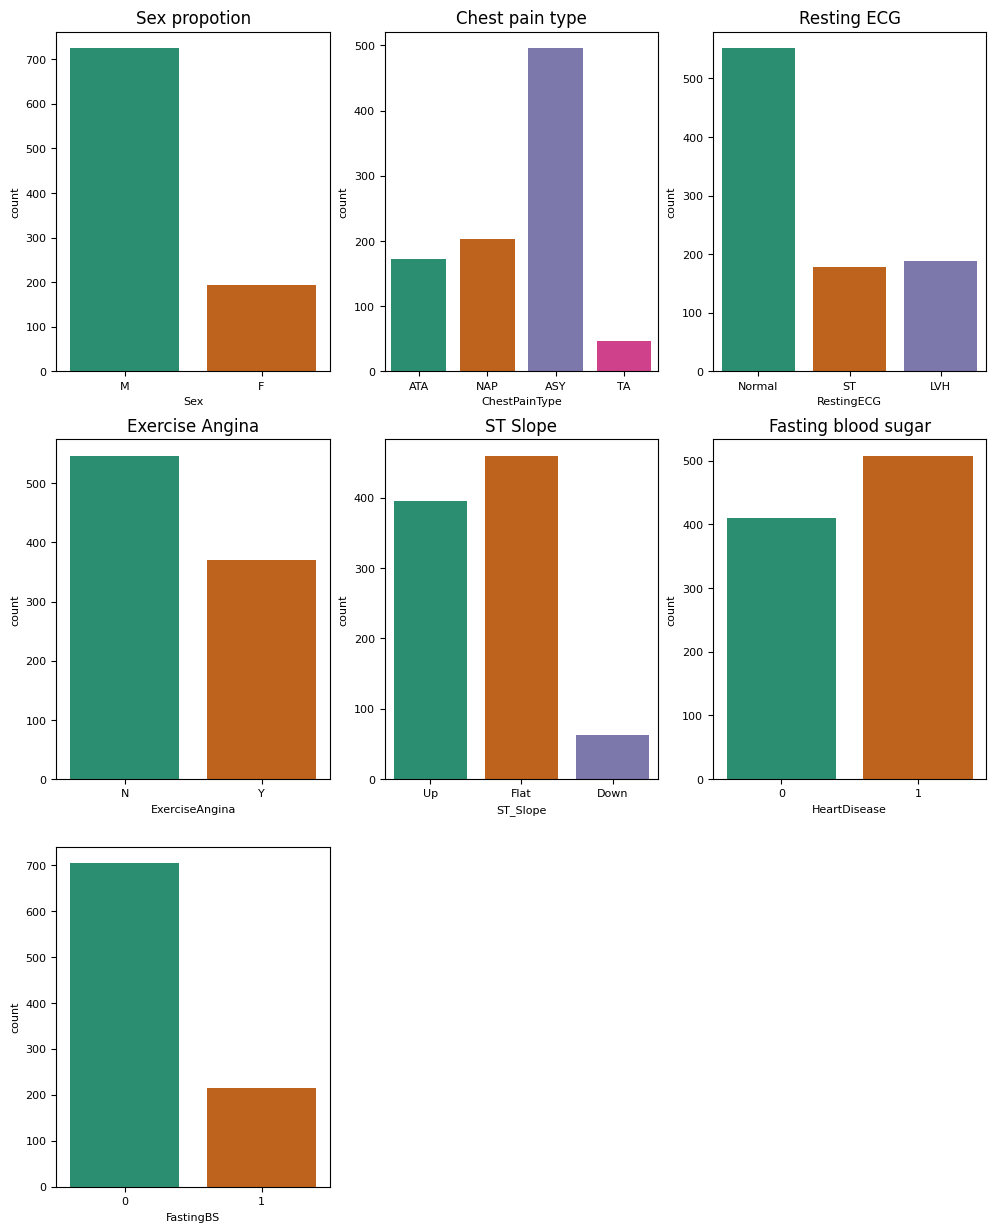

In [225]:
f, ax = plt.subplots(3, 3, figsize=(12, 15))

sns.countplot(df, x='Sex', ax=ax[0][0], palette='Dark2')
ax[0][0].set_title('Sex propotion')

sns.countplot(df, x='ChestPainType', ax=ax[0][1], palette='Dark2')
ax[0][1].set_title('Chest pain type')

sns.countplot(df, x='RestingECG', ax=ax[0][2], palette='Dark2')
ax[0][2].set_title('Resting ECG')

sns.countplot(df, x='ExerciseAngina', ax=ax[1][0], palette='Dark2')
ax[1][0].set_title('Exercise Angina')

sns.countplot(df, x='ST_Slope', ax=ax[1][1], palette='Dark2')
ax[1][1].set_title('ST Slope')

sns.countplot(df, x='HeartDisease', ax=ax[1][2], palette='Dark2')
ax[1][2].set_title('Heart Disease')

sns.countplot(df, x='FastingBS', ax=ax[2][0], palette='Dark2')
ax[1][2].set_title('Fasting blood sugar')


for a in ax.flat:
    a.title.set_fontsize(12)
    a.xaxis.label.set_fontsize(8)
    a.yaxis.label.set_fontsize(8)
    a.tick_params(axis='both', labelsize=8)
ax[2, 1].axis('off')
ax[2, 2].axis('off')

In [ ]:
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

**Sex**: There is a notable disproportion between males and females and it is not clear, whether it is bias or a reflection of reality.
**Chest Pain Type**: Asymptomatic pain type is overrepresented and Typical Angina is downrepresented. 
**Resting ECG**: there are more than 50% of Normal observations.
**Heart Disease** and **Exercise Angina** are relatively ballanced.
**ST Slope**: downsloping is not popular.
**Fasting blood sugar**: the majority of people in the dataset have FastingBS level < 120 mg/dl.

#### Numerical variables 

(0.0, 1.0, 0.0, 1.0)

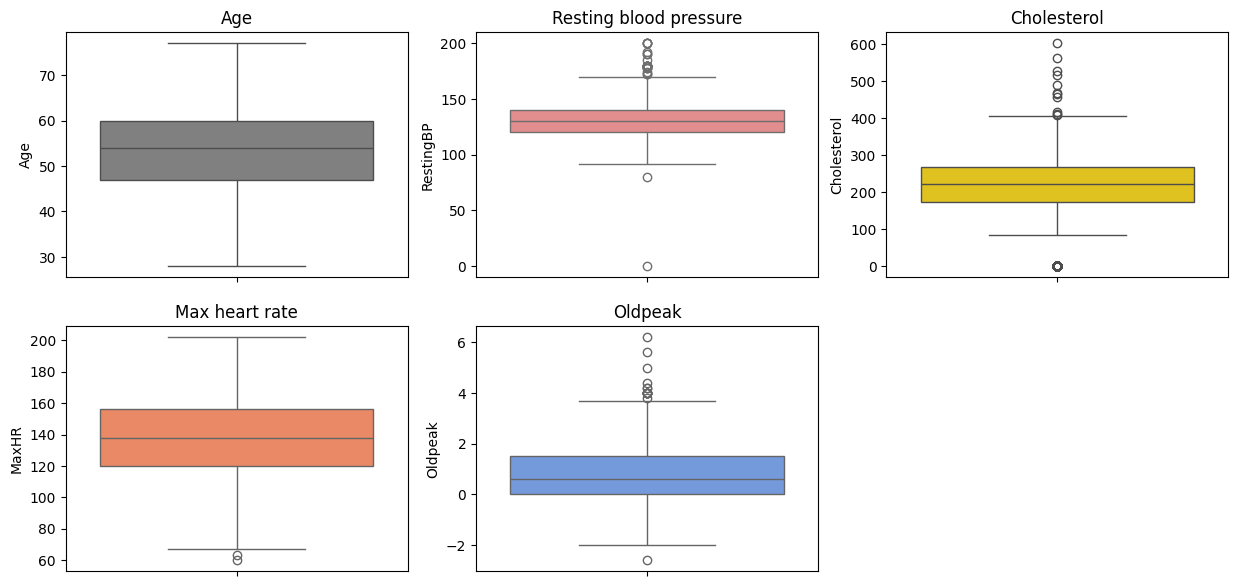

In [110]:
f, ax = plt.subplots(2, 3, figsize=(15, 7))

sns.boxplot(df, y='Age', ax=ax[0][0], color='grey')
ax[0][0].set_title('Age')

sns.boxplot(df, y='RestingBP', ax=ax[0][1], color='lightcoral')
ax[0][1].set_title('Resting blood pressure')

sns.boxplot(df, y='Cholesterol', ax=ax[0][2], color='gold')
ax[0][2].set_title('Cholesterol')

sns.boxplot(df, y='MaxHR', ax=ax[1][0], color='coral')
ax[1][0].set_title('Max heart rate')

sns.boxplot(df, y='Oldpeak', ax=ax[1][1], color='cornflowerblue')
ax[1][1].set_title('Oldpeak')

ax[1][2].axis('off')

**Age**: Minimal age in the dataset is 28, maximum age is 77, median age is around 55. There are no outliers.
**RestingBP** has tight distribution with some outliers at the top and few of them at the bottom.
**Cholesterol**: there are some outliers on both edges of the distribution
**Max heart rate**: outliers at the bottom edge
**Oldpeak**: Outliers at both edges, but mostly at the top.

###  Features effect on heart disease

#### Aging effect on heart desease exposure

Let's look at distribution of heart disease in different age groups

Text(0.5, 1.0, 'Age distribution for heart disease groups')

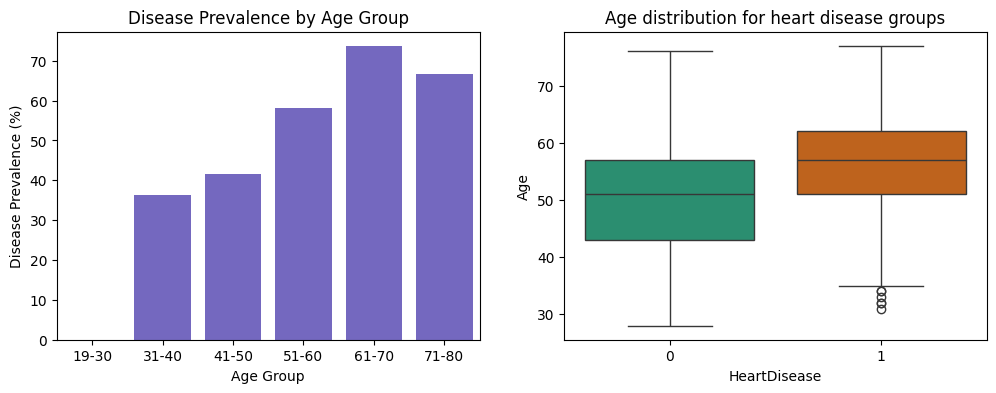

In [151]:
bins = [19, 30, 40, 50, 60, 70, 80]
labels = ['19-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

f, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x='AgeGroup', y='HeartDisease', data=df, ci=None, estimator=lambda x: sum(x) / len(x) * 100, color='slateblue', ax=ax[0])
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Disease Prevalence (%)')
ax[0].set_title('Disease Prevalence by Age Group')

sns.boxplot(x='HeartDisease', y='Age', data=df, palette='Dark2', ax=ax[1])
ax[1].set_title('Age distribution for heart disease groups')

It appears that the older individuals are, the higher their risk of developing CVD. There is no big difference between 31-40 and 41-50 groups, but then prevalence grows by step of 10% between groups. However, it is lower for the oldest group 71-81 than for 61-70. 

#### Other numerical variables versus disease

Text(0.5, 1.0, 'Oldpeak')

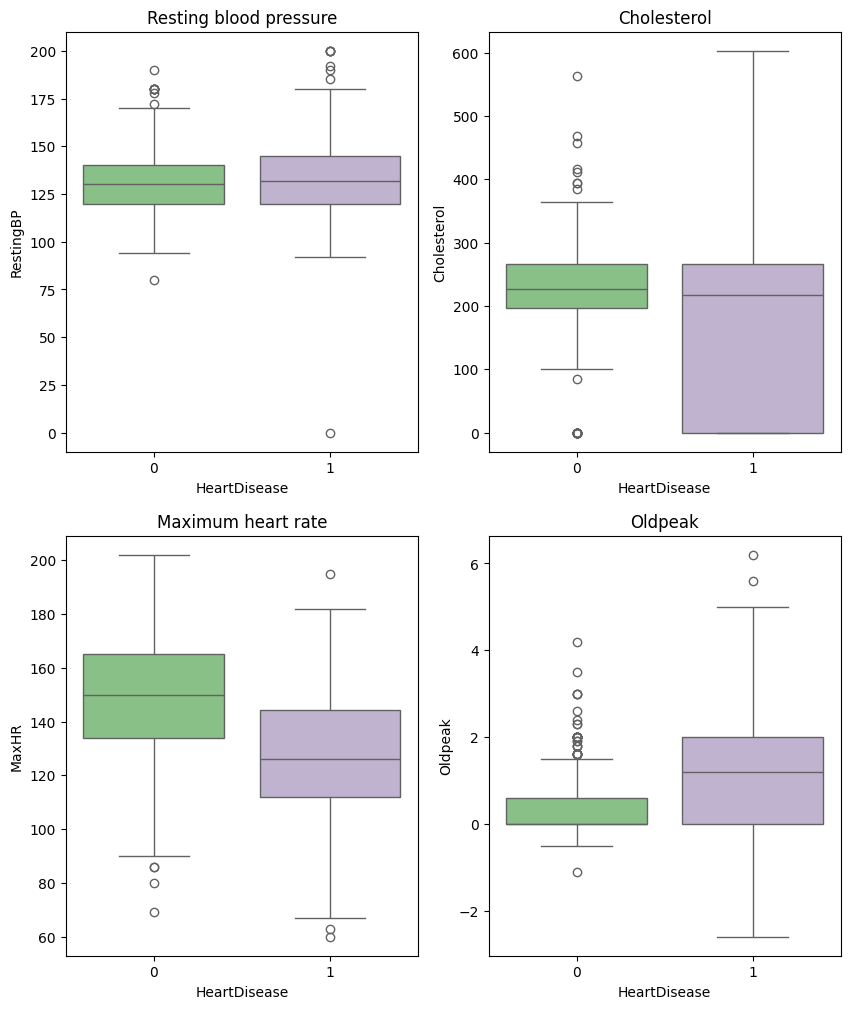

In [232]:
f, axs = plt.subplots(2, 2, figsize=(10, 12))

sns.boxplot(x='HeartDisease', y='RestingBP', data=df, palette='Accent', ax=axs[0, 0])
axs[0][0].set_title('Resting blood pressure')

sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, palette='Accent', ax=axs[0, 1])
axs[0][1].set_title('Cholesterol')


sns.boxplot(x='HeartDisease', y='MaxHR', data=df, palette='Accent', ax=axs[1, 0])
axs[1][0].set_title('Maximum heart rate')

sns.boxplot(x='HeartDisease', y='Oldpeak', data=df, palette='Accent', ax=axs[1, 1])
axs[1][1].set_title('Oldpeak')

**RestingBP** is very similarly distributed in both groups. **Cholesterol** median values are close, but it is more tight in the healthy group while in the disease group there are more observations with extreme values on both ends. Perhaps it might contribute to the model quality. **Maximum heart rate** is higher in the healthy group. **Oldpeak** has an even tighter distribution in the healthy group than Cholesterol, while having a much broader range in the disease group.

#### Heart disease chest pain type

<Axes: xlabel='ChestPainType', ylabel='count'>

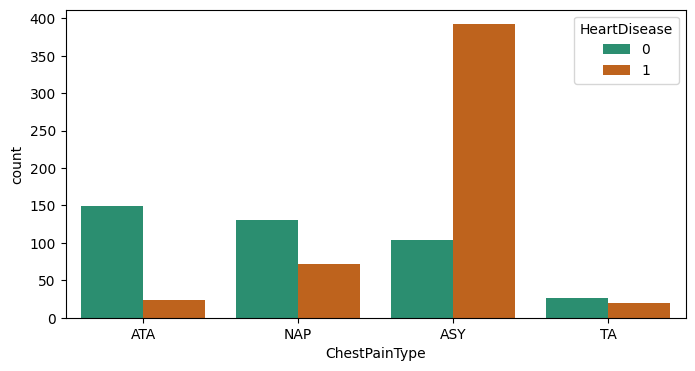

In [152]:
plt.figure(figsize=(8, 4))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='Dark2')

Asymptomical pain type is significantly more prevalent in the disease group. ATA type is also informative, observed mostly in healthy individuals. This feature seems to be an important marker for diagnostics.

####  Other categorical variables vs Heart disease

(0.0, 1.0, 0.0, 1.0)

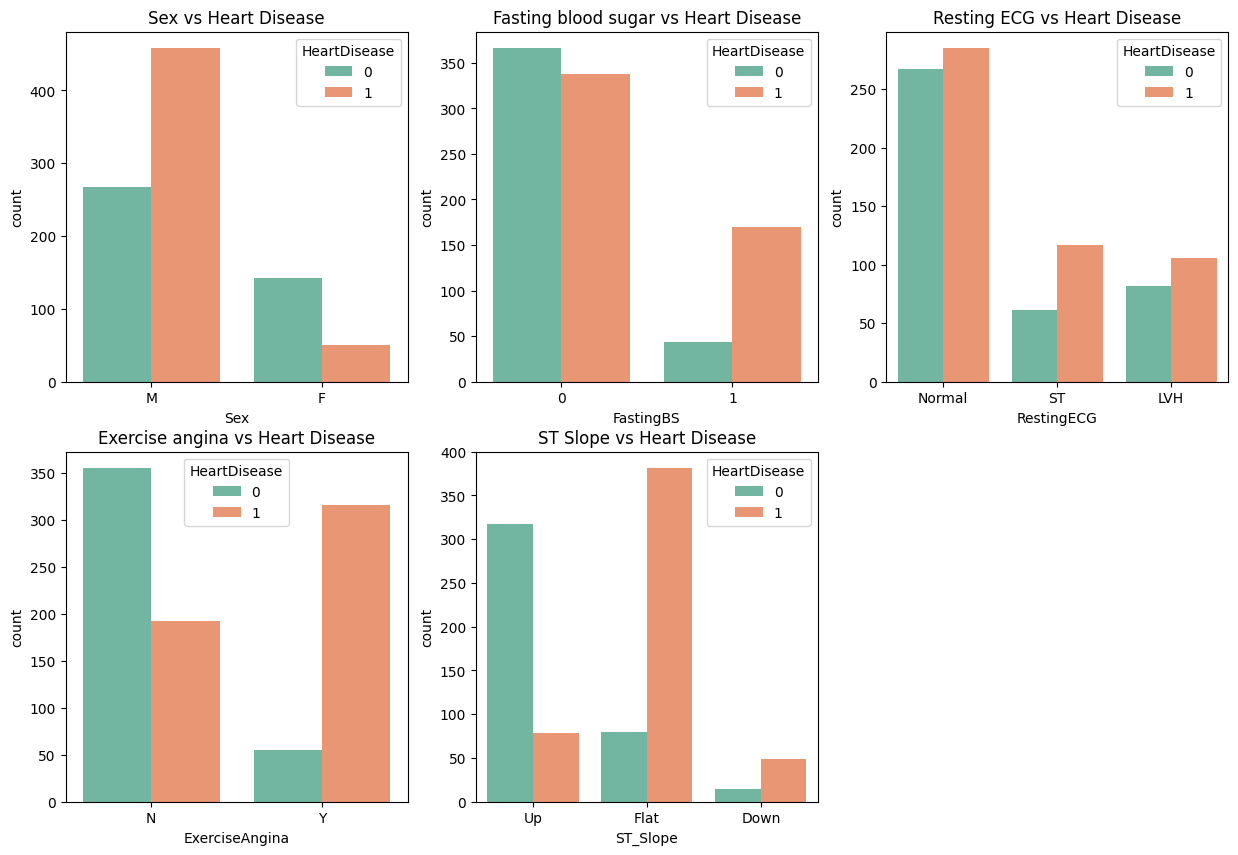

In [177]:
f, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x='Sex', hue='HeartDisease', data=df, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Sex vs Heart Disease')

sns.countplot(x='FastingBS', hue='HeartDisease', data=df, palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Fasting blood sugar vs Heart Disease')

sns.countplot(x='RestingECG', hue='HeartDisease', data=df, palette='Set2', ax=axs[0, 2])
axs[0, 2].set_title('Resting ECG vs Heart Disease')


sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Exercise angina vs Heart Disease')

sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, palette='Set2', ax=axs[1, 1])
axs[1, 1].set_title('ST Slope vs Heart Disease')
axs[1, 2].axis('off')

- Here we see that there is not only a disproportion between the number of males and females in the dataset, but there is a disbalance in the disease prevalence inside these groups. There are much more males with CVD than healthy ones, while in the females group the vast majority of individuals are healthy.
- FastingBS distribution shows that it is usual to have normal blood sugar values for people with CVD, but high values occur mostly in the disease group.
- ST slope seems to be a good predictor, having disproportion at every factor level.
- ExcerciseAngina is similar to the FastingBS, showing that people with exercise angina most likely are at risk or have developed CVD.
- There is a disbalance in Resting ECG "ST" group, but generally, this variable seems to be not very informative.

### Correlations

#### Convert string variables to numeric  

In [198]:
df_num = df.copy()
df_num['Sex'].replace(['M', 'F'], [0, 1], inplace=True)
df_num['RestingECG'].replace(['Normal', 'ST', 'LVH'], [0, 1, 2], inplace=True)
df_num['ExerciseAngina'].replace(['N', 'Y'], [0, 1], inplace=True)
df_num['ST_Slope'].replace(['Up', 'Flat', 'Down'], [0, 1, 2], inplace=True)
df_num['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'], [0, 1, 2, 3], inplace=True)

# Drop techincal variable

df_num = df_num.drop(['AgeGroup'], axis=1)

#### Correlation heatmap

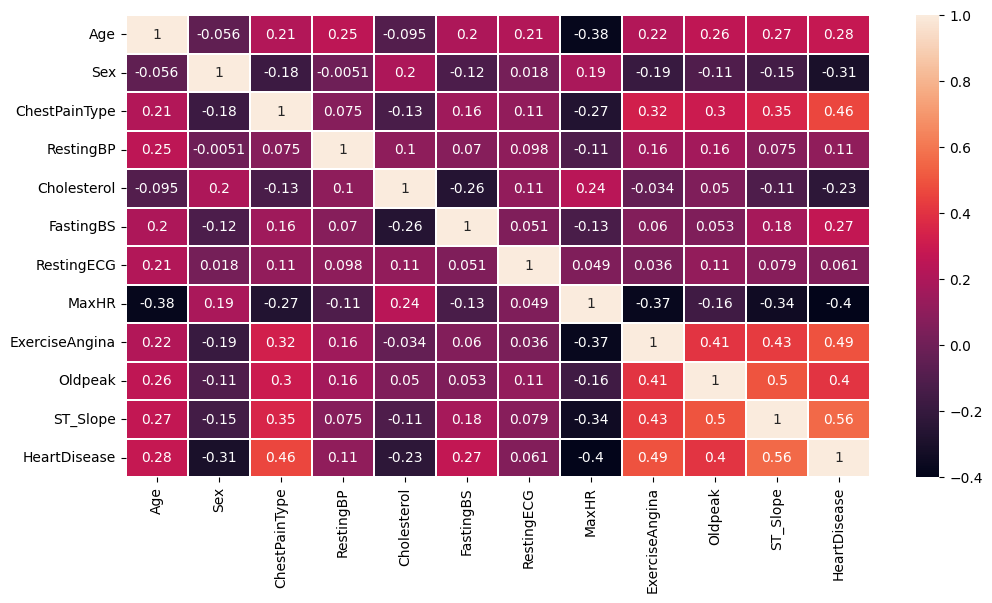

In [215]:
sns.heatmap(df_num.corr(), annot=True, linewidths=0.2)

fig=plt.gcf()
fig.set_size_inches(12, 6)

The features most correlated with heart disease are: 

- ST_Slope (0.56)
- ExcerciseAngina (0.49)
- ChestPainType (0.46)
- Oldpeak (0.4)
- MaxHR (-0.4)

The least informative features by correlation with HeartDisease:

- RestingECG (0.061)
- RestingBP (0.11)

Features ST_slope, Oldpeak, and ExcerciseAngina are relatively highly correlated.

### Future feature engineering suggestions 

We can perform one-hot encoding for categorical variables: Sex, ChestPainType, FastingBS, ExerciseAngina, ST_Slope.

RestingECG and RestingBP variables seem to be not informative and perhaps it is better not to use them in the model.

There are several features with moderate correlation. We can try to combine them using PCA and see whether it affects prediction results.

### Conclusions

The dataset contains very valuable numeric and categorical data and seems to be comprehensive and informative. There are no missing values at all. All numeric features have some amount of outliers.

There are several variables with moderate correlation with the HeartDisease varaible: ChestPainType, FastingBS, ExcerciseAngina, ST_Slope, Oldpeak, MaxHR. These features also exhibit a moderate correlation with each other. The most informative feature is the ST_Slope with r-coeffitient of 0.56.  Therefore it is probably better to remove them from further analysis or at least consider this possibility. The most noninformative features are RestingECG and RestingBP, having a low correlation with the HeartDisease variable.
Other features seem to be not very informative, but still carrying some signal. There is a notable shift in age between healthy and disease groups. Sex is not only disproportionally represented in the dataset, but there is also a big difference in the proportions of healthy males and females. It is not clear, whether it is a bias of the dataset or a reflection of reality, and this question is worth researching.

Further feature engineering might include one-hot encoding for categorical variables. Perhaps, it is worth trying to combine correlated features into a single one using PCA and check, whether it affects the prediction quality.